## Image Retrieval 

In this task, I will use multimodal models to perform image-text matching using the open-source model Blip from Salesforce. So if you take a picture of a woman and a dog on the beach, and also provide the text "My sister and her best friend.". The model outputs a matching score to indicate how similar the text and image are. 

### Multimodal Models

When a task requires a model to be able to take as an input more than type of data, such as an image and a sentence, we'll call it multimodal.

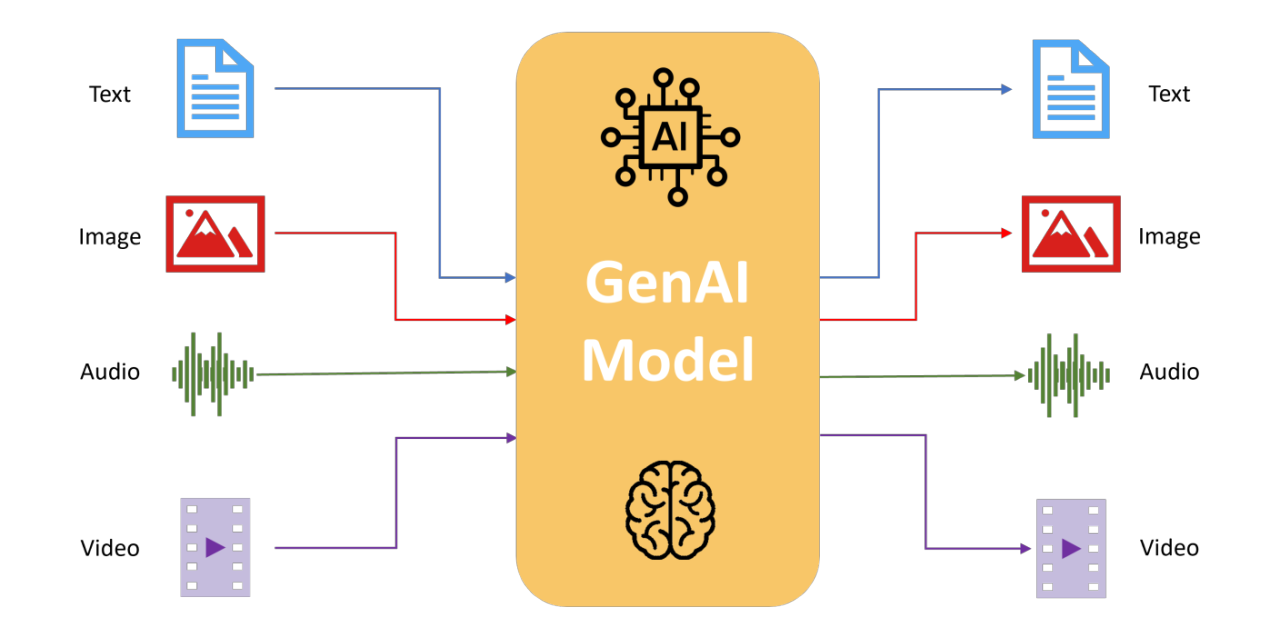

### Applications

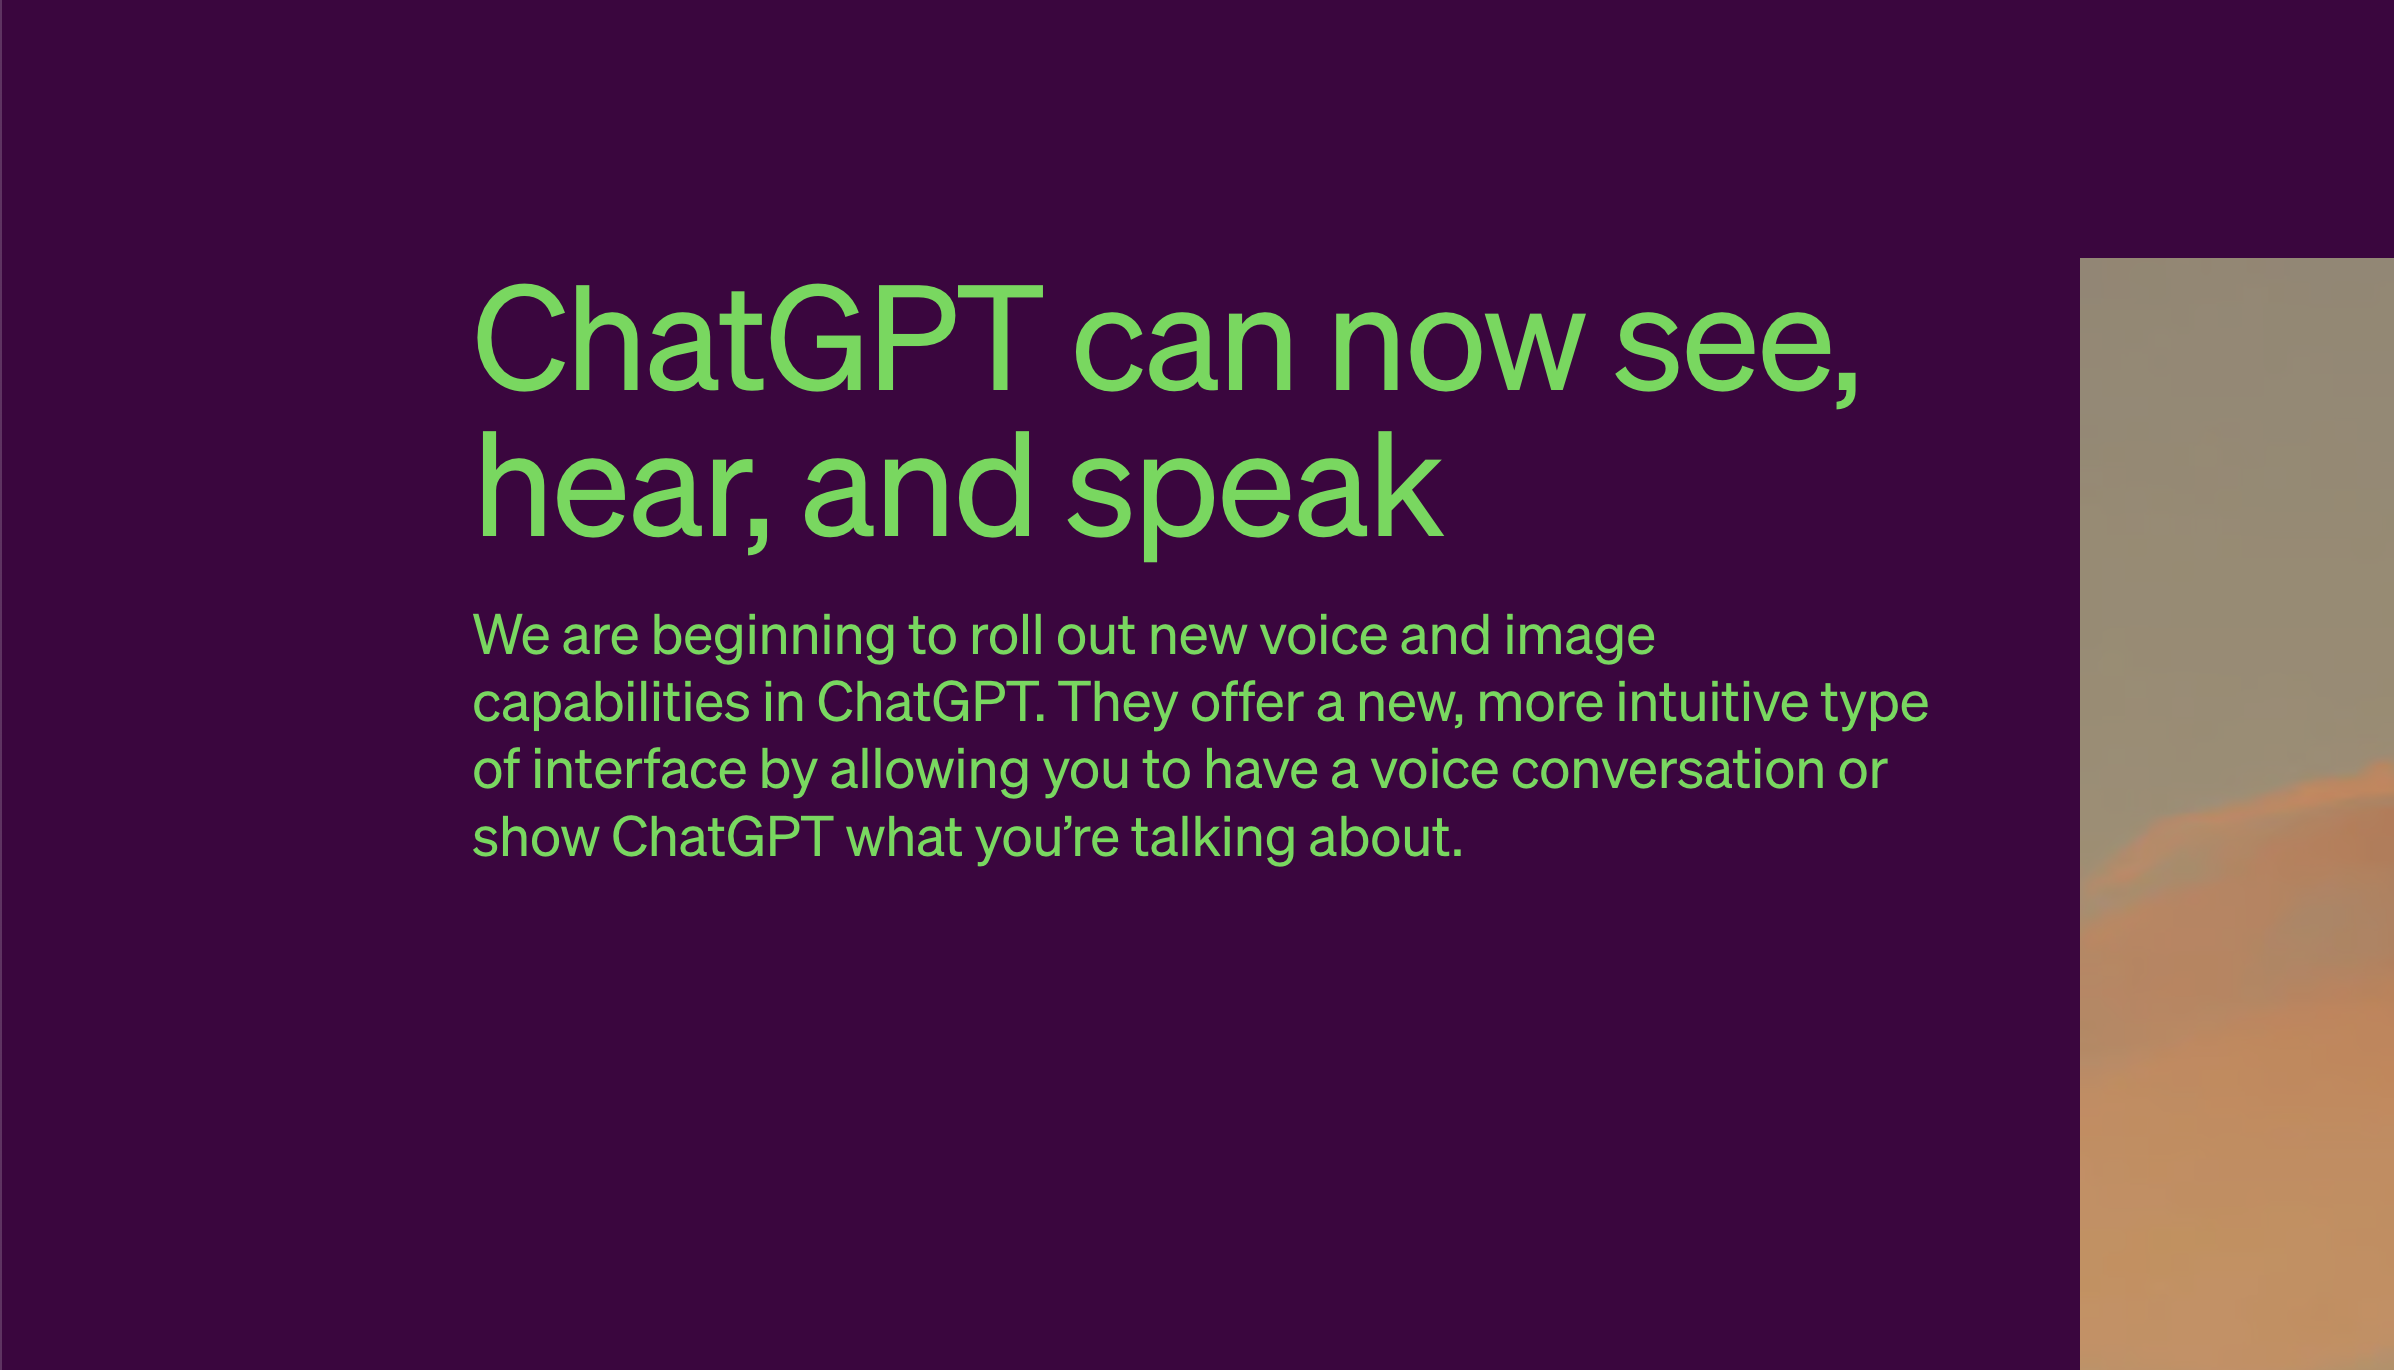

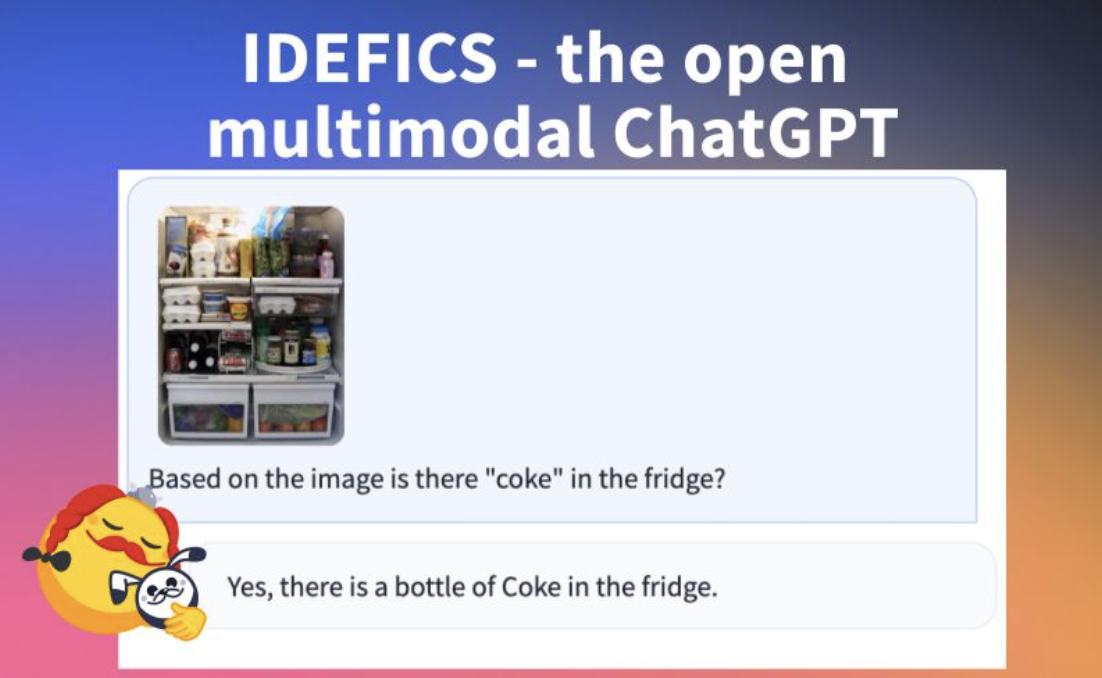

### Multimodal Tasks

Here are some common multimodal tasks that we will go through:

- Image to text matching
- Image captioning
- Visual Q&A
- Zero-shot image classification

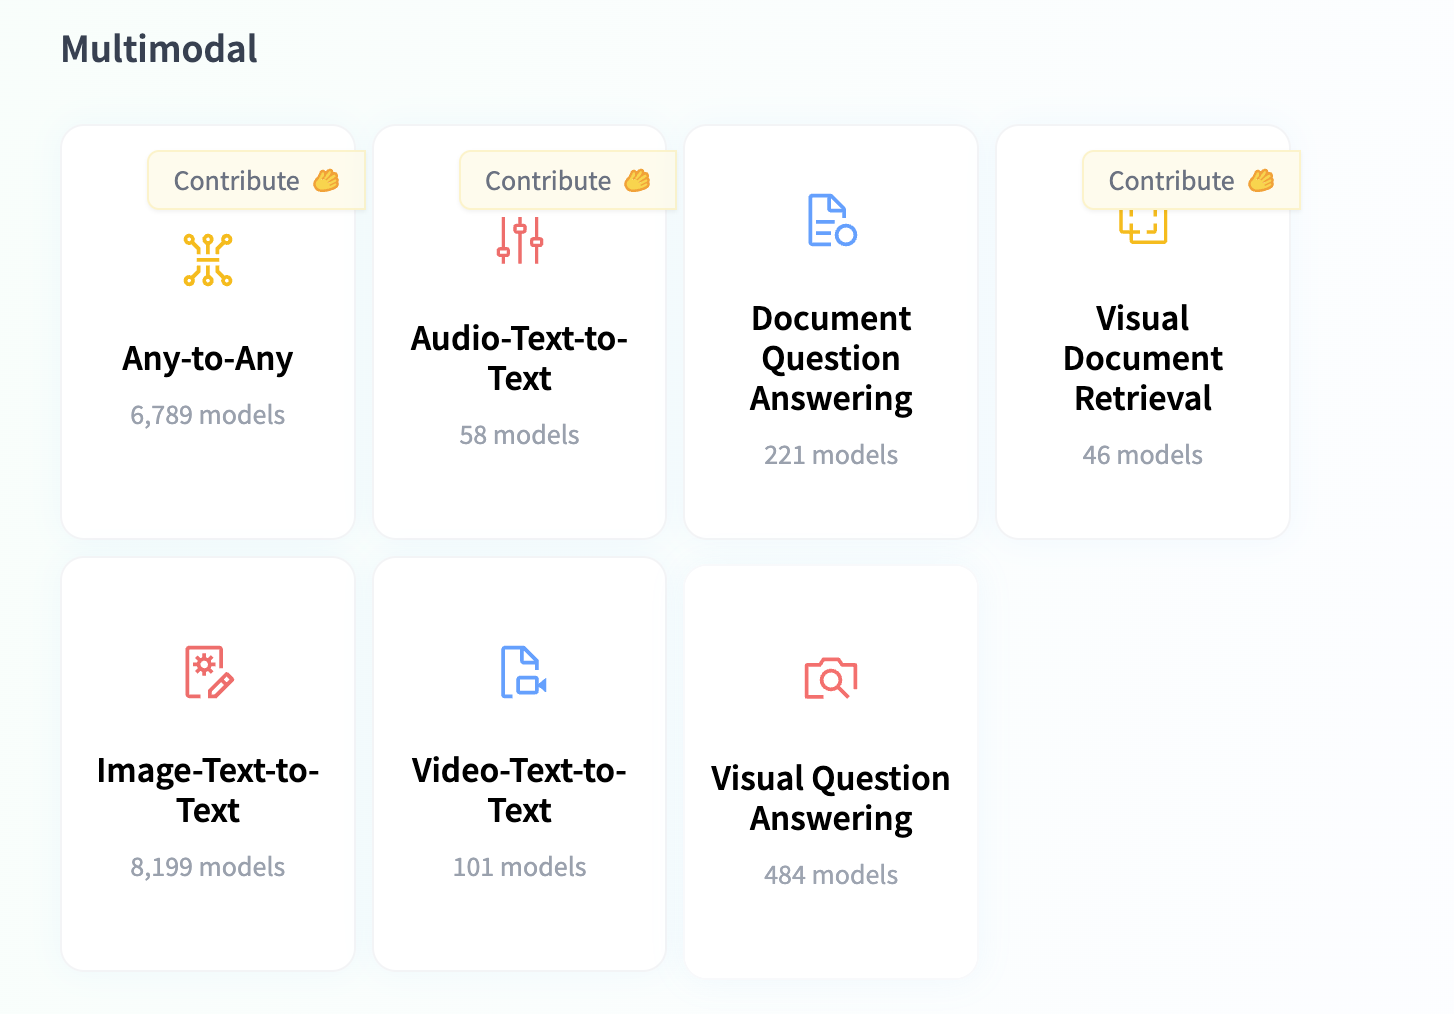

### BLIP

**Tasks**

- Image-text retrieval

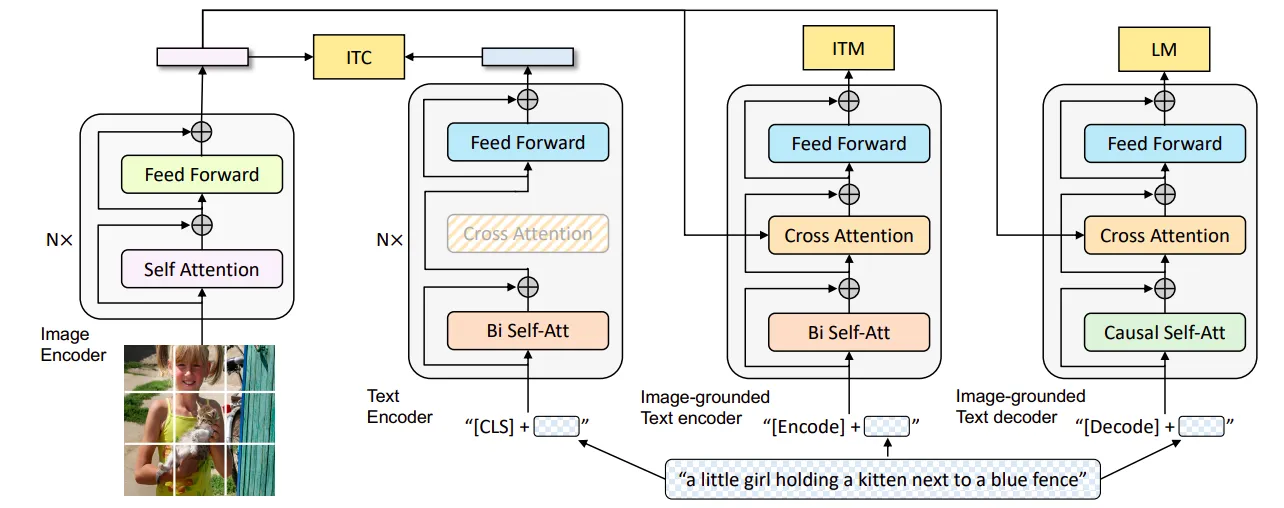

In [6]:
from transformers.utils import logging
logging.set_verbosity_error()

https://huggingface.co/Salesforce/blip-itm-base-coco

In [7]:
# Load model directly
from transformers import AutoProcessor, BlipForImageTextRetrieval
processor = AutoProcessor.from_pretrained("Salesforce/blip-itm-base-coco")

In [8]:
model = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")

In [9]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'

In [10]:
from PIL import Image
import requests

In [11]:
raw_image = Image.open(
    requests.get(img_url, stream = True).raw
).convert('RGB')

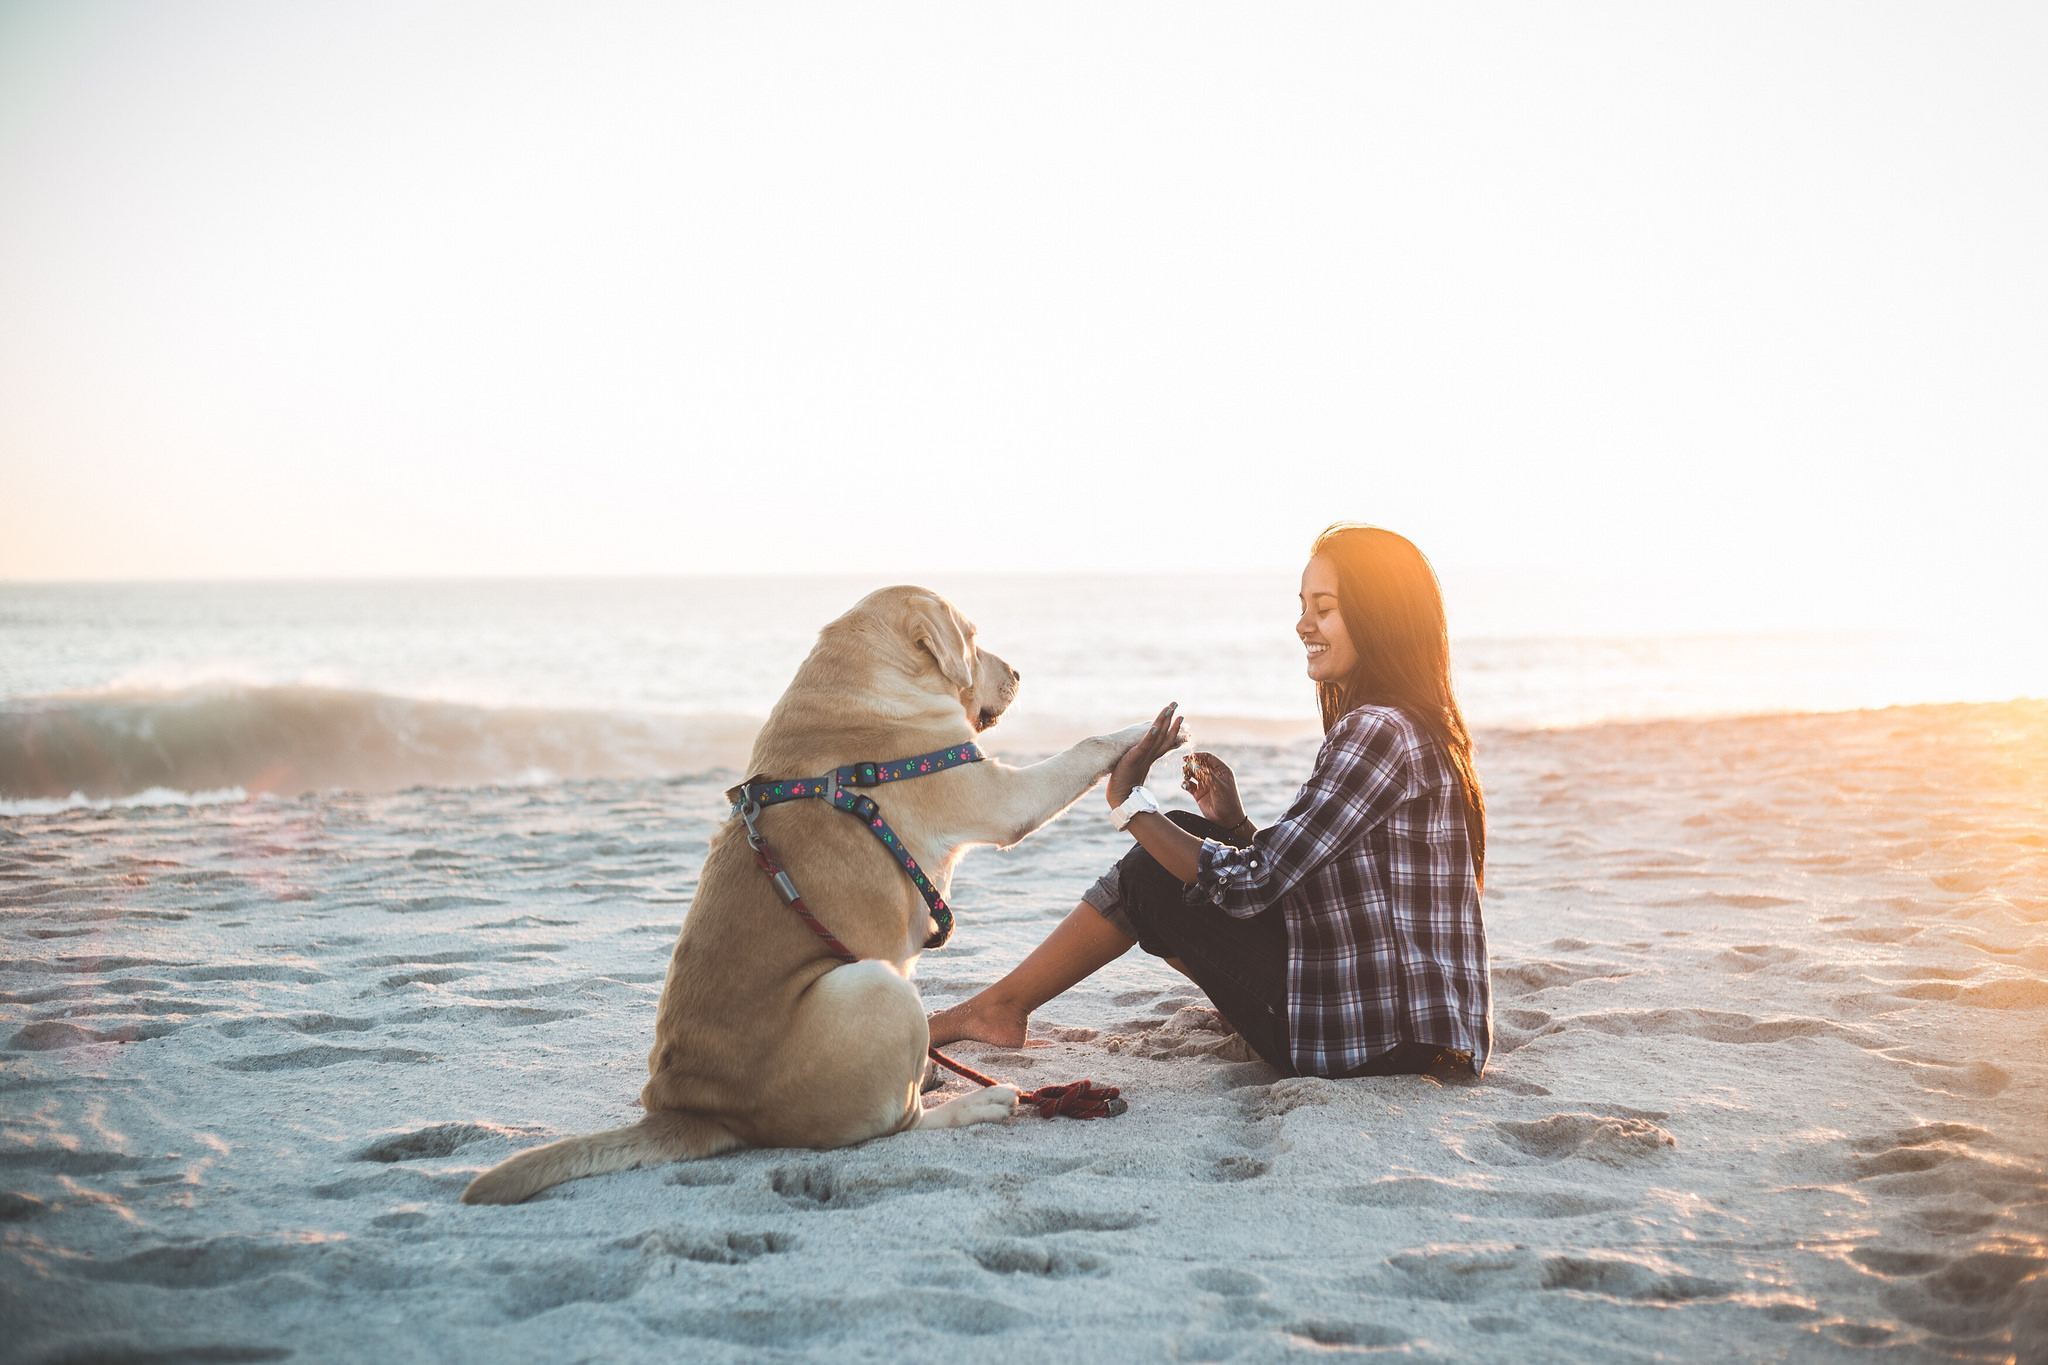

In [12]:
raw_image

In [13]:
text = "an image of a woman and a dog on the beach"

In [14]:
inputs = processor(
    images = raw_image,
    text = text,
    return_tensors = "pt"
)

### 数据预处理

- 将原始图像 raw_image 和文本 text 一起传入处理器。
- 它会做以下事情：
    - 图像会被 resize、normalize 等处理。
    - 文本会被分词。
    - 两者打包成模型输入格式。
- `return_tensors="pt"` 表示返回 PyTorch 张量（tensor）。

In [11]:
inputs

{'pixel_values': tensor([[[[ 0.8647,  0.9230,  0.9376,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9084,  0.9376,  0.9522,  ...,  1.7552,  1.7552,  1.7552],
          [ 0.9376,  0.9376,  0.9668,  ...,  1.7552,  1.7552,  1.7552],
          ...,
          [-0.7850, -0.7850, -0.7266,  ..., -0.3178, -0.2740, -0.3616],
          [-0.7558, -0.7558, -0.7412,  ..., -0.3178, -0.3616, -0.4346],
          [-0.7558, -0.7704, -0.7850,  ..., -0.3616, -0.4346, -0.4784]],

         [[ 1.2194,  1.2495,  1.2795,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2344,  1.2645,  1.2945,  ...,  1.8948,  1.8948,  1.8948],
          [ 1.2495,  1.2795,  1.3095,  ...,  1.8948,  1.8948,  1.8948],
          ...,
          [-0.5965, -0.5965, -0.5515,  ..., -0.4014, -0.3264, -0.4164],
          [-0.5665, -0.5665, -0.5515,  ..., -0.3864, -0.4164, -0.4914],
          [-0.5665, -0.5815, -0.5965,  ..., -0.4164, -0.4764, -0.5365]],

         [[ 1.2927,  1.3211,  1.3496,  ...,  1.9753,  1.9753,  1.9753],
          [ 1

In [14]:
itm_scores = model(**inputs)[0] # 获取图文匹配的分数

In [15]:
itm_scores

tensor([[-2.2228,  2.2260]], grad_fn=<AddmmBackward0>)

In [16]:
import torch

In [17]:
itm_score = torch.nn.functional.softmax( # 使用 Softmax 转换为概率
    itm_scores, dim = 1
)

In [18]:
itm_score

tensor([[0.0116, 0.9884]], grad_fn=<SoftmaxBackward0>)

In [19]:
print(f"""\
The image and text are matched \
with a probability of {itm_score[0][1]:.4f}""")

The image and text are matched with a probability of 0.9884



## 🧠 图文匹配模型笔记（BLIP）

### 📦 模型与处理器加载

```python
from transformers import AutoProcessor
from transformers import BlipForImageTextRetrieval

processor = AutoProcessor.from_pretrained("Salesforce/blip-itm-base-coco")
model = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")

	•	AutoProcessor：自动处理图像和文本输入
	•	BlipForImageTextRetrieval：BLIP 模型，用于图像-文本匹配任务（Image-Text Matching）
```

⸻

🖼️ 文本 + 图像 输入准备

inputs = processor(
    images=raw_image,
    text=text,
    return_tensors="pt"
)

- images：原始图像（如 PIL 图像）
- text：与图像相关的文字描述
- return_tensors="pt"：返回 PyTorch tensor

⸻

🔮 模型推理（获取匹配 logits）

itm_scores = model(**inputs)[0]

返回一个形如 tensor([[-2.2228, 2.2260]]) 的张量
- 第一个值代表“不匹配”
- 第二个值代表“匹配”

⸻

🔁 概率输出（Softmax）

import torch

itm_score = torch.nn.functional.softmax(itm_scores, dim=1)

- 将 logits 转为概率分布
- dim=1 表示对每一组 [不匹配, 匹配] 进行 softmax

输出示例：

tensor([[0.0072, 0.9928]])

概率解释：
- 不匹配：0.0072
- 匹配：0.9928 → 高度相关

⸻

✅ 总结流程图（文字版）
```
图像 + 文本。  
   ↓  
AutoProcessor → 标准化输入  
   ↓  
BLIP 模型 → 输出 logits（匹配得分）  
   ↓  
Softmax → 概率形式的匹配评分
```


### 🧠 图文匹配（ITM） vs 图文检索（Retrieval）

📌 概念区分

| 任务 | 简介 | 输入 | 输出 | 应用场景 |
|------|------|------|------|----------|
| 图文匹配（ITM, Image-Text Matching） | 判断一张图片和一句话是否匹配（通常是二分类任务） | 图像 + 文本 | 是否匹配的概率或得分 | 图文对质量判别、训练检索模型的监督信号 |
| 图文检索（Retrieval） | 在大量图片/文本中找出最相关的内容 | 文本（或图像）+ 候选图像集（或文本集） | 匹配得分 + 排序 | 文本检索图片、图片检索文本 |

⸻

🔍 模型解释：BlipForImageTextRetrieval

虽然模型名字中有 “Retrieval”，但它支持两个功能：
1. 图文匹配（ITM）功能：

- 输入图像和文本，输出 itm_scores。
- 使用 softmax 得到匹配概率。

适用于“这对图文是否匹配？”的判断。

```Python
processor = AutoProcessor.from_pretrained("Salesforce/blip-itm-base-coco")
model = BlipForImageTextRetrieval.from_pretrained("Salesforce/blip-itm-base-coco")

inputs = processor(images=raw_image, text=text, return_tensors="pt")
itm_scores = model(**inputs)[0]
itm_probs = torch.nn.functional.softmax(itm_scores, dim=1)
```

示例输出：
```
tensor([[-2.2228,  2.2260]])  # logits for [not match, match]
```

2. 图文检索（Retrieval）功能：

- 提取图像和文本的语义特征（embeddings）。
- 计算图文之间的相似度（如余弦相似度）。

可用于大规模图文检索。


示例伪代码：
```Python
text_feat = model.get_text_features(...)
image_feat = model.get_image_features(...)
similarity = cosine_similarity(text_feat, image_feat)
```

⸻

✅ 总结重点

- BlipForImageTextRetrieval 是一个支持 图文匹配 + 图文检索 的通用模型。
- 你当前使用的是其中的 ITM 模块。
- 要做检索任务，需要提取 embedding 特征 来计算相似度。